#Correlation Matrix

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36819 entries, 0 to 36818
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   having_IP_Address         36819 non-null  int64
 1   URL_Length                36819 non-null  int64
 2   Shortining_Service        36819 non-null  int64
 3   double_slash_redirecting  36819 non-null  int64
 4   Prefix_Suffix             36819 non-null  int64
 5   having_Sub_Domain         36819 non-null  int64
 6   SSLfinal_State            36819 non-null  int64
 7   suspicious_parameter      36819 non-null  int64
 8   Favicon                   36819 non-null  int64
 9   HTTPS_token               36819 non-null  int64
 10  Request_URL               36819 non-null  int64
 11  URL_of_Anchor             36819 non-null  int64
 12  Links_in_tags             36819 non-null  int64
 13  SFH                       36819 non-null  int64
 14  Submitting_to_email     

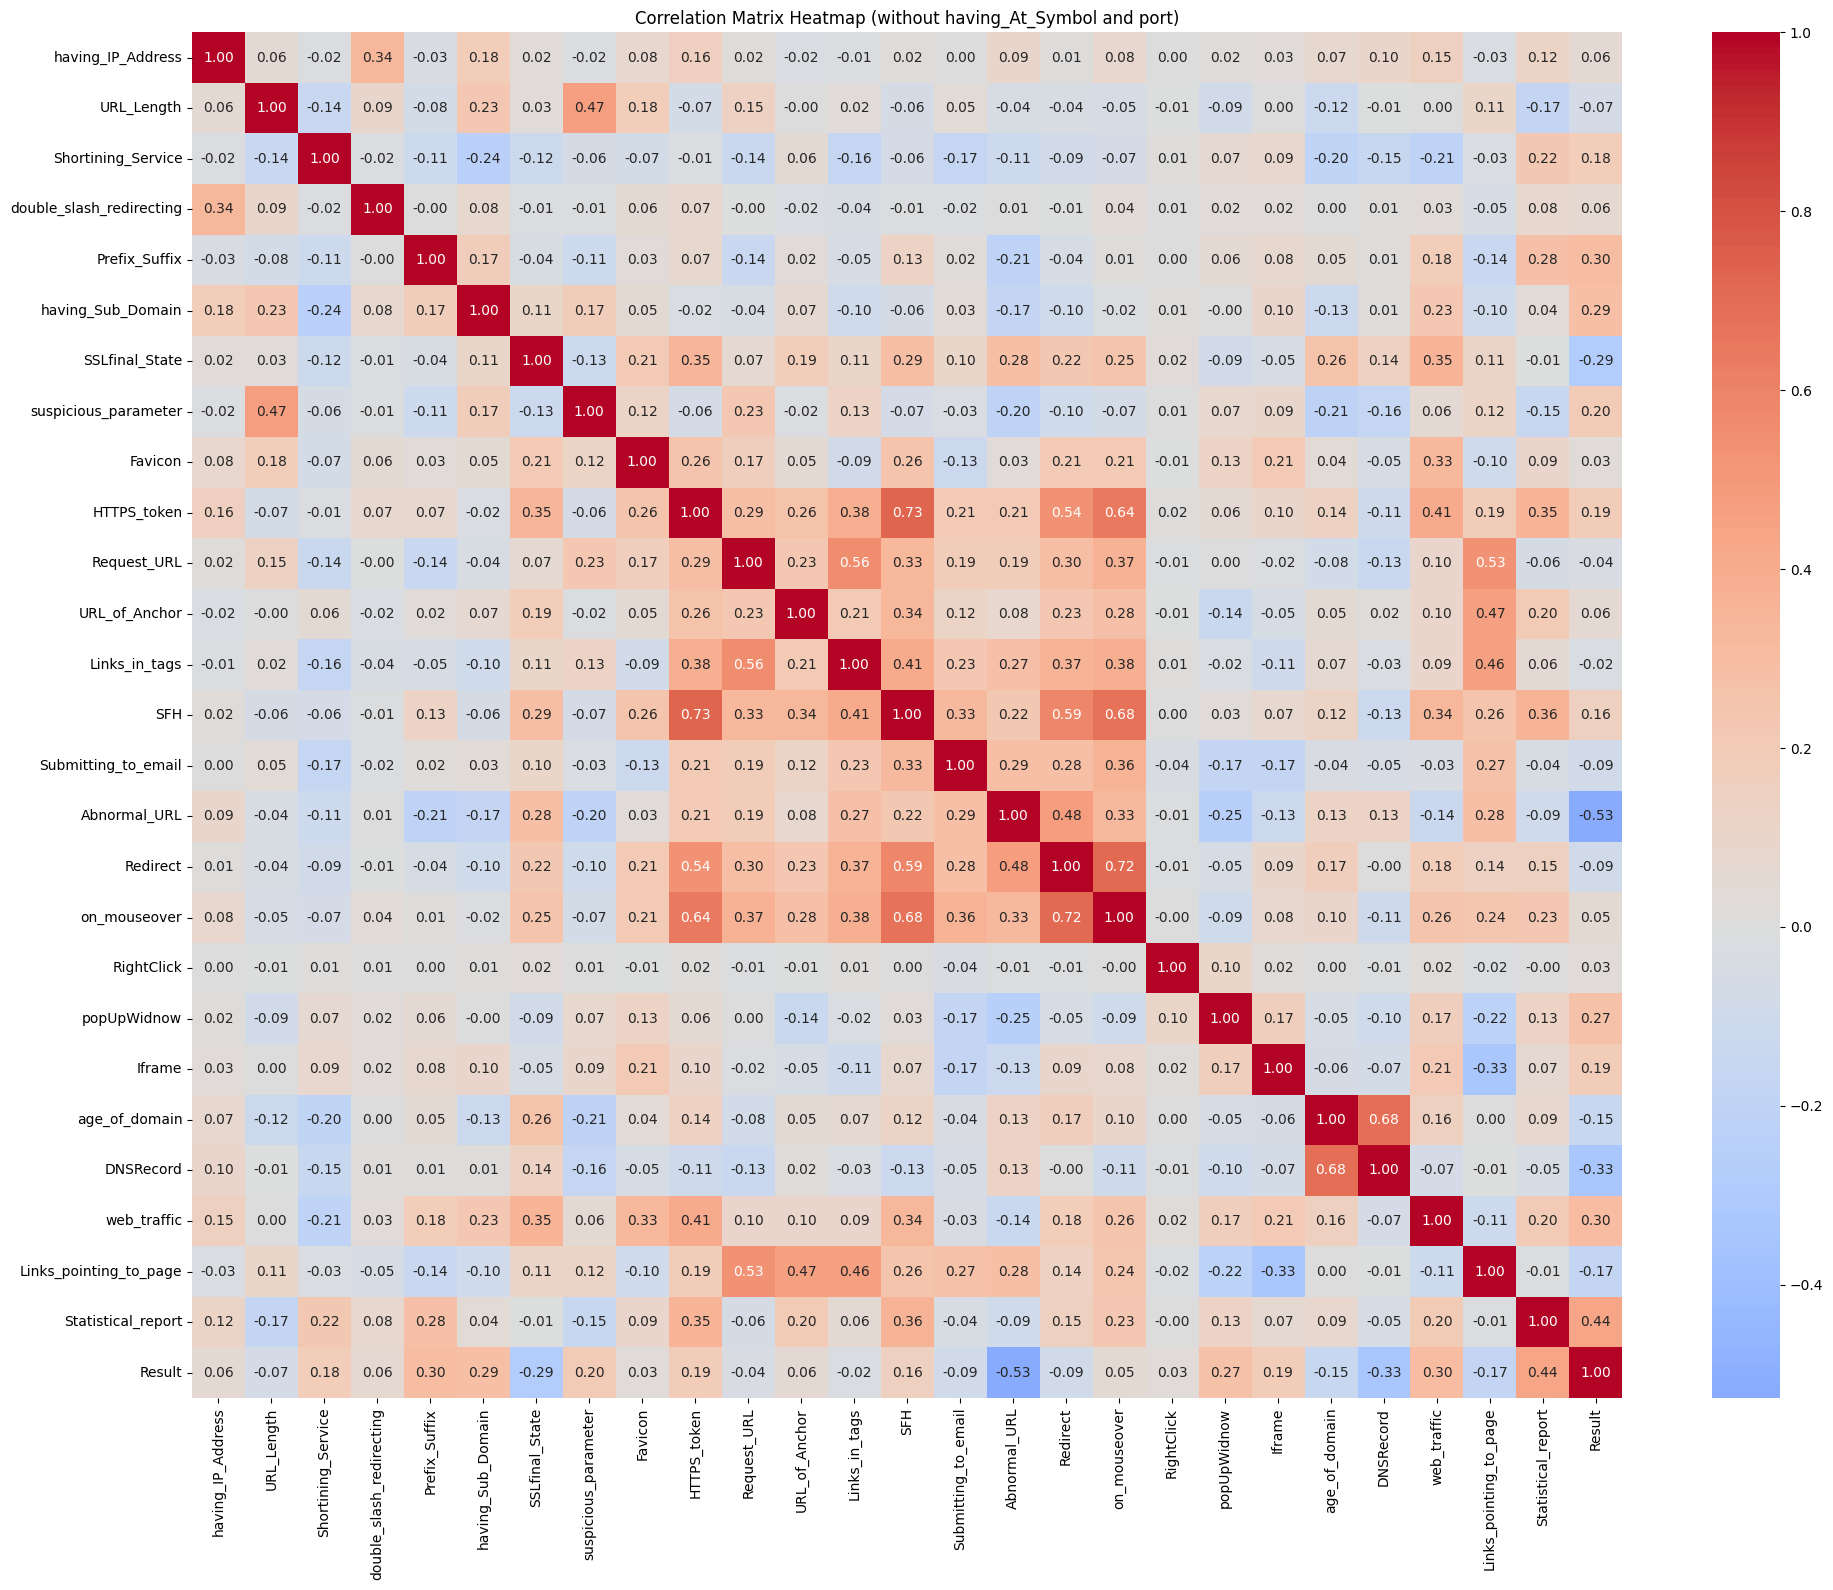


Top 10 Features Most Correlated with Result (by absolute value):

Positive correlations:
Statistical_report: 0.445
web_traffic: 0.304
Prefix_Suffix: 0.298
having_Sub_Domain: 0.287
popUpWidnow: 0.273

Negative correlations:
Abnormal_URL: -0.527
DNSRecord: -0.328
SSLfinal_State: -0.287
Links_pointing_to_page: -0.171
age_of_domain: -0.150

Strongest correlations (absolute value > 0.5):
HTTPS_token - SFH: 0.726
Redirect - on_mouseover: 0.715
age_of_domain - DNSRecord: 0.684
SFH - on_mouseover: 0.676
HTTPS_token - on_mouseover: 0.638
SFH - Redirect: 0.590
Request_URL - Links_in_tags: 0.557
HTTPS_token - Redirect: 0.540
Request_URL - Links_pointing_to_page: 0.531
Abnormal_URL - Result: -0.527


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define columns (excluding having_At_Symbol and port)
columns = [
    'having_IP_Address', 'URL_Length', 'Shortining_Service',
    'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
    'suspicious_parameter', 'Favicon', 'HTTPS_token', 'Request_URL',
    'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
    'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain',
    'DNSRecord', 'web_traffic', 'Links_pointing_to_page', 'Statistical_report', 'Result'
]

# Read the dataset, skipping the first row (header)
df = pd.read_csv('dataset.csv', names=columns, skiprows=1)

# Convert all columns to numeric
df = df.apply(pd.to_numeric)

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix Heatmap (without having_At_Symbol and port)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print top correlations with Result
print("\nTop 10 Features Most Correlated with Result (by absolute value):")
correlations_with_result = correlation_matrix['Result'].drop('Result')
correlations_sorted = correlations_with_result.abs().sort_values(ascending=False)
print("\nPositive correlations:")
positive_corr = correlations_sorted[correlations_with_result > 0].head()
for feature in positive_corr.index:
    correlation = correlations_with_result[feature]
    print(f"{feature}: {correlation:.3f}")

print("\nNegative correlations:")
negative_corr = correlations_sorted[correlations_with_result < 0].head()
for feature in negative_corr.index:
    correlation = correlations_with_result[feature]
    print(f"{feature}: {correlation:.3f}")

# Additional analysis of the strongest correlations
print("\nStrongest correlations (absolute value > 0.5):")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        val = correlation_matrix.iloc[i, j]
        if abs(val) > 0.5:
            strong_correlations.append({
                'feature1': correlation_matrix.columns[i],
                'feature2': correlation_matrix.columns[j],
                'correlation': val
            })

strong_correlations_sorted = sorted(strong_correlations,
                                  key=lambda x: abs(x['correlation']),
                                  reverse=True)

for corr in strong_correlations_sorted:
    print(f"{corr['feature1']} - {corr['feature2']}: {corr['correlation']:.3f}")

#mean and std

In [12]:
import pandas as pd
import numpy as np

# Define columns (without having_At_Symbol and port)
columns = [
    'having_IP_Address', 'URL_Length', 'Shortining_Service',
    'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
    'suspicious_parameter', 'Favicon', 'HTTPS_token', 'Request_URL',
    'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
    'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain',
    'DNSRecord', 'web_traffic', 'Links_pointing_to_page', 'Statistical_report', 'Result'
]

# Read the dataset, skipping the first row (header)
df = pd.read_csv('dataset.csv', names=columns, skiprows=1)

# Convert all columns to numeric
df = df.apply(pd.to_numeric)

# Calculate mean and standard deviation
stats_df = pd.DataFrame({
    'Mean': df.mean(),
    'Std Dev': df.std()
})

# Round to 3 decimal places for better readability
stats_df = stats_df.round(3)

# Sort by feature name alphabetically for easy reference
stats_df_sorted = stats_df.sort_index()

print("Mean and Standard Deviation for Each Feature:")
print(stats_df_sorted)

Mean and Standard Deviation for Each Feature:
                           Mean  Std Dev
Abnormal_URL              0.174    0.985
DNSRecord                 0.359    0.933
Favicon                   0.120    0.993
HTTPS_token               0.866    0.501
Iframe                   -0.732    0.682
Links_in_tags             0.377    0.620
Links_pointing_to_page    0.082    0.880
Prefix_Suffix             0.616    0.788
Redirect                  0.768    0.578
Request_URL               0.473    0.863
Result                   -0.209    0.978
RightClick               -0.992    0.125
SFH                       0.870    0.469
SSLfinal_State            0.572    0.820
Shortining_Service        0.900    0.435
Statistical_report        0.425    0.888
Submitting_to_email       0.284    0.959
URL_Length                0.499    0.784
URL_of_Anchor             0.246    0.878
age_of_domain             0.133    0.991
double_slash_redirecting  0.987    0.161
having_IP_Address         0.989    0.149
having_Sub_